# Lab3. Binary Classification of Heart Disease of Patients using DNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt

In [2]:
#1. Load the dataset:
df=pd.read_csv('heart_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
X=df.drop('target',axis=1)

In [7]:
y=df['target']

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
#2. Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [11]:
training_data = np.array(X_train,"float32")
target_data = np.array(y_train, "float32")

In [12]:
#3. Create a neural network
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
#4. Compile your model
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [14]:
#5. Print the summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [15]:
#6. Train the model
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
print(model.predict(training_data).round())

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 990us/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 914us/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 872us/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 947us/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 955us/step - loss: 0.4587 - accuracy: 0.5413

In [37]:
#7. Save the trained model
history = model.fit(training_data, target_data, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5211 - accuracy: 0.7720 - val_loss: 0.3500 - val_accuracy: 0.8571
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8135 - val_loss: 0.4639 - val_accuracy: 0.7959
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7772 - val_loss: 0.3290 - val_accuracy: 0.8571
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7876 - val_loss: 0.8231 - val_accuracy: 0.6327
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7772 - val_loss: 0.4840 - val_accuracy: 0.7755
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7772 - val_loss: 0.6857 - val_accuracy: 0.7143
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7824 - val_loss: 0.6500 - val_accuracy: 0.7143
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7927 - val_loss: 0.3564 - val_accuracy: 0.8571
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7876 - val_loss: 1.2517 - val_accuracy: 0.5510
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.7720 - val_loss: 0.3275 - val_accuracy: 0.8163
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.7979 - val_loss: 0.4092 - val_accuracy: 0.7755
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.7824 - val_loss: 0.3305 - val_accuracy: 0.8367
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.8031 - val_loss: 0.4817 - val_accuracy: 0.7959
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7720 - val_loss: 0.5255 - val_accuracy: 0.7143
Epoch 

In [38]:
#8. Evaluate
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.7772 - accuracy: 0.5902


[0.7771831750869751, 0.5901639461517334]

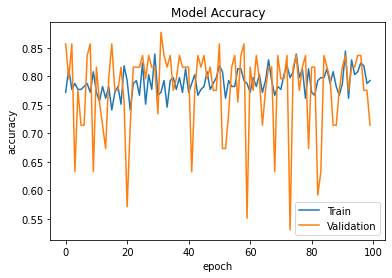

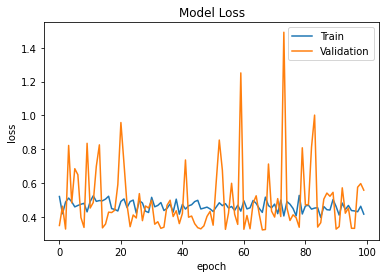

In [39]:
#9. Print the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## #10. Do further experiments


1. Add a hidden layer with 16 nodes and Relu activation function. Note
that now this Dense layer should be the first hidden layer, which is
followed by the previous Dense layer with 8 nodes. Now retrain your
model, evaluate and print the accuracy and loss chart using
matplotlib.

In [19]:
#3. Create a neural network
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.4588 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.5331
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.5372
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.5331
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.5124
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.5041
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.5372
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.5455
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.5207
Epoch 11/

Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.8347
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.8140
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.8058
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.8512
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.8471
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.8099
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.8388
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.8140
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.8223
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.8223


In [20]:
#saving
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1219 - accuracy: 0.8394 - val_loss: 0.1725 - val_accuracy: 0.7347
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.8342 - val_loss: 0.0829 - val_accuracy: 0.8571
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.8446 - val_loss: 0.1598 - val_accuracy: 0.7755
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.8446 - val_loss: 0.1174 - val_accuracy: 0.8367
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.8238 - val_loss: 0.0715 - val_accuracy: 0.9184
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.8135 - val_loss: 0.0803 - val_accuracy: 0.8980
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.8187 - val_loss: 0.0831 - val_accuracy: 0.8776
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.8187 - val_loss: 0.0876 - val_accuracy: 0.8571
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.8497 - val_loss: 0.1533 - val_accuracy: 0.7755
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.8446 - val_loss: 0.0800 - val_accuracy: 0.8776
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.8238 - val_loss: 0.0785 - val_accuracy: 0.8980
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.8446 - val_loss: 0.1149 - val_accuracy: 0.8367
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.8446 - val_loss: 0.1142 - val_accuracy: 0.8367
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.8394 - val_loss: 0.1943 - val_accuracy: 0.7347
Epoch 

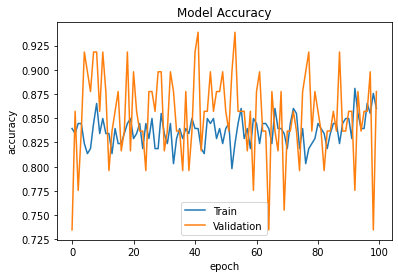

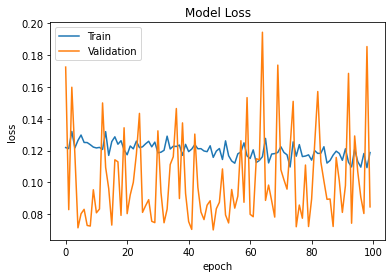

In [21]:
#Print the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

2. Add a hidden layer with 32 nodes and Relu activation function. Note
that now this Dense layer should be the first hidden layer. Now retrain
your model, evaluate and print the accuracy and loss chart using
matplotlib.

In [22]:
#3. Create a neural network
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.4588 - accuracy: 0.5413
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 87/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 93/100


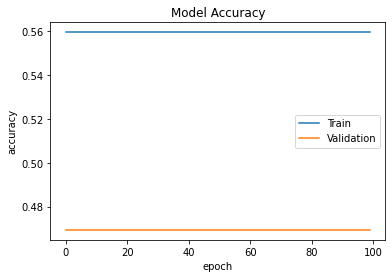

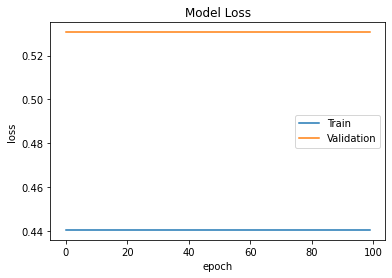

In [23]:
#Print the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

3. Now, increase the nodes 64, 32, 16 for the three hidden layers. Now
retrain your model, evaluate and print the accuracy and loss chart
using matplotlib.

In [24]:
#3. Create a neural network
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.5165
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.5165
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.6116
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.5579
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.6116
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.6694
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.6322
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.6694
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.6694
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.6157
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.7769
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.7934
Epoch 85/100
25/25 [==============================] - 0s 997us/step - loss: 0.1388 - accuracy: 0.7934
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.8017
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.8058
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.8306
Epoch 89/100
25/25 [==============================] - 0s 959us/step - loss: 0.1373 - accuracy: 0.8099
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.8099
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.8058
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.8347
Epoch 93/

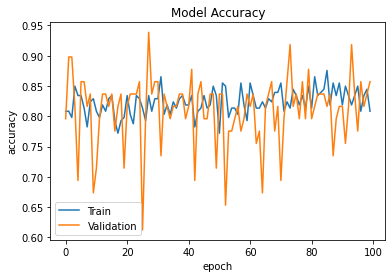

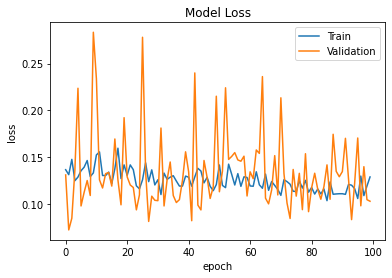

In [25]:
#Print the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

4. Now, increase number of epochs as 150, 200, 300 and batch size as
15 and 20. Now retrain your model, evaluate and print the accuracy
and loss chart using matplotlib.

In [26]:
#3. Create a neural network
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=150,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/150
17/17 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.5702
Epoch 2/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.6529
Epoch 3/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.6240
Epoch 4/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.6364
Epoch 5/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.6694
Epoch 6/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.6570
Epoch 7/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.6240
Epoch 8/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.6405
Epoch 9/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.6488
Epoch 10/150
17/17 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.6488
Epoch 11/

17/17 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.8099
Epoch 84/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.8017
Epoch 85/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.8471
Epoch 86/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.8099
Epoch 87/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.8058
Epoch 88/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.8223
Epoch 89/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.8140
Epoch 90/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.8554
Epoch 91/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.8430
Epoch 92/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.8264
Epoch 93/150


Epoch 68/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.8238 - val_loss: 0.1043 - val_accuracy: 0.8163
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.8653 - val_loss: 0.1122 - val_accuracy: 0.8571
Epoch 70/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.8653 - val_loss: 0.0976 - val_accuracy: 0.8163
Epoch 71/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.8549 - val_loss: 0.0934 - val_accuracy: 0.8980
Epoch 72/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.8549 - val_loss: 0.1199 - val_accuracy: 0.8571
Epoch 73/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.8394 - val_loss: 0.0962 - val_accuracy: 0.8776
Epoch 74/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.8756 - val_loss: 0.0883 - val_accuracy: 0.8367
Epoch 

In [34]:
#3. Create a neural network
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=200,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100,batch_size=10 ,verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.5372
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.5950
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.6281
Epoch 4/200
17/17 [==============================] - 0s 986us/step - loss: 0.2965 - accuracy: 0.6281
Epoch 5/200
17/17 [==============================] - 0s 935us/step - loss: 0.2744 - accuracy: 0.6653
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.6612
Epoch 7/200
17/17 [==============================] - 0s 964us/step - loss: 0.2918 - accuracy: 0.6405
Epoch 8/200
17/17 [==============================] - 0s 997us/step - loss: 0.2929 - accuracy: 0.6570
Epoch 9/200
17/17 [==============================] - 0s 938us/step - loss: 0.2526 - accuracy: 0.7066
Epoch 10/200
17/17 [==============================] - 0s 997us/step - loss: 0.3104 - accuracy: 0.61

17/17 [==============================] - 0s 801us/step - loss: 0.1131 - accuracy: 0.8554
Epoch 163/200
17/17 [==============================] - 0s 865us/step - loss: 0.1296 - accuracy: 0.8099
Epoch 164/200
17/17 [==============================] - 0s 872us/step - loss: 0.1071 - accuracy: 0.8430
Epoch 165/200
17/17 [==============================] - 0s 901us/step - loss: 0.1102 - accuracy: 0.8347
Epoch 166/200
17/17 [==============================] - 0s 810us/step - loss: 0.1183 - accuracy: 0.8306
Epoch 167/200
17/17 [==============================] - 0s 833us/step - loss: 0.1170 - accuracy: 0.8306
Epoch 168/200
17/17 [==============================] - 0s 869us/step - loss: 0.1038 - accuracy: 0.8512
Epoch 169/200
17/17 [==============================] - 0s 823us/step - loss: 0.1027 - accuracy: 0.8678
Epoch 170/200
17/17 [==============================] - 0s 829us/step - loss: 0.1116 - accuracy: 0.8430
Epoch 171/200
17/17 [==============================] - 0s 851us/step - loss: 0.1080 - a

Epoch 31/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.8549 - val_loss: 0.0871 - val_accuracy: 0.8776
Epoch 32/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.8238 - val_loss: 0.2242 - val_accuracy: 0.6735
Epoch 33/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.8601 - val_loss: 0.0667 - val_accuracy: 0.8980
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.8653 - val_loss: 0.0703 - val_accuracy: 0.8776
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1136 - accuracy: 0.8446 - val_loss: 0.0667 - val_accuracy: 0.8980
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1185 - accuracy: 0.8238 - val_loss: 0.0705 - val_accuracy: 0.9184
Epoch 37/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.8549 - val_loss: 0.0778 - val_accuracy: 0.8776
Epoch 

Epoch 89/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0879 - accuracy: 0.8808 - val_loss: 0.1304 - val_accuracy: 0.7959
Epoch 90/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0973 - accuracy: 0.8549 - val_loss: 0.1037 - val_accuracy: 0.8776
Epoch 91/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.8912 - val_loss: 0.1489 - val_accuracy: 0.8163
Epoch 92/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1237 - accuracy: 0.8135 - val_loss: 0.0789 - val_accuracy: 0.8980
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0923 - accuracy: 0.8601 - val_loss: 0.1187 - val_accuracy: 0.8776
Epoch 94/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0882 - accuracy: 0.8808 - val_loss: 0.0803 - val_accuracy: 0.8776
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0979 - accuracy: 0.8290 - val_loss: 0.1859 - val_accuracy: 0.7347
Epoch

In [32]:
#3. Create a neural network
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=300,batch_size=15, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 2/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 3/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 4/300
17/17 [==============================] - 0s 980us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 5/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 6/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 7/300
17/17 [==============================] - 0s 872us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 8/300
17/17 [==============================] - 0s 934us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 9/300
17/17 [==============================] - 0s 923us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 10/300
17/17 [==============================] - 0s 934us/step - loss: 0.5413 - accuracy: 0.4587

17/17 [==============================] - 0s 973us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 163/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 164/300
17/17 [==============================] - 0s 863us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 165/300
17/17 [==============================] - 0s 984us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 166/300
17/17 [==============================] - 0s 997us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 167/300
17/17 [==============================] - 0s 810us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 168/300
17/17 [==============================] - 0s 813us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 169/300
17/17 [==============================] - 0s 869us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 170/300
17/17 [==============================] - 0s 935us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 171/300
17/17 [==============================] - 0s 947us/step - loss: 0.5413 - acc

17/17 [==============================] - 0s 765us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 243/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 244/300
17/17 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.4587
Epoch 245/300
17/17 [==============================] - 0s 934us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 246/300
17/17 [==============================] - 0s 980us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 247/300
17/17 [==============================] - 0s 949us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 248/300
17/17 [==============================] - 0s 997us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 249/300
17/17 [==============================] - 0s 868us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 250/300
17/17 [==============================] - 0s 997us/step - loss: 0.5413 - accuracy: 0.4587
Epoch 251/300
17/17 [==============================] - 0s 997us/step - loss: 0.5413 - accur

Epoch 74/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 75/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 76/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 77/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 78/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 79/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 80/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.4404 - val_loss: 0.4694 - val_accuracy: 0.5306
Epoch 

5. Now use binary_crossentropy loss function instead of mean square
error loss function. Now, compare the accuracy ad loss function
values. Draw a bar chart and compare the performance.

In [42]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.fit(training_data, target_data, epochs=100,batch_size=10, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 23.8295 - accuracy: 0.4587
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 14.1693 - accuracy: 0.4587
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 6.1804 - accuracy: 0.4587
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 1.4328 - accuracy: 0.3306
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1.0193 - accuracy: 0.3512
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8779 - accuracy: 0.3760
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7781 - accuracy: 0.5372
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5868
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.5909
Epoch 1

Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7562
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7479
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7438
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7603
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7521
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7727
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7603
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7521
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7686
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7562


In [43]:
history1 = model.fit(X_train, y_train, validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.4798 - accuracy: 0.7409 - val_loss: 0.5317 - val_accuracy: 0.7755
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7565 - val_loss: 0.4198 - val_accuracy: 0.7551
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7772 - val_loss: 0.4223 - val_accuracy: 0.7755
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.7565 - val_loss: 0.4536 - val_accuracy: 0.7755
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.7513 - val_loss: 0.4179 - val_accuracy: 0.7551
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7358 - val_loss: 0.4538 - val_accuracy: 0.7755
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7772 - val_loss: 0.4195 - val_accuracy: 0.7959
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8031 - val_loss: 0.3662 - val_accuracy: 0.8163
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7979 - val_loss: 0.4378 - val_accuracy: 0.7959
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8187 - val_loss: 0.3589 - val_accuracy: 0.7551
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8135 - val_loss: 0.3762 - val_accuracy: 0.7959
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.8394 - val_loss: 0.3858 - val_accuracy: 0.8367
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.7772 - val_loss: 0.3548 - val_accuracy: 0.7959
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8290 - val_loss: 0.3789 - val_accuracy: 0.8367
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

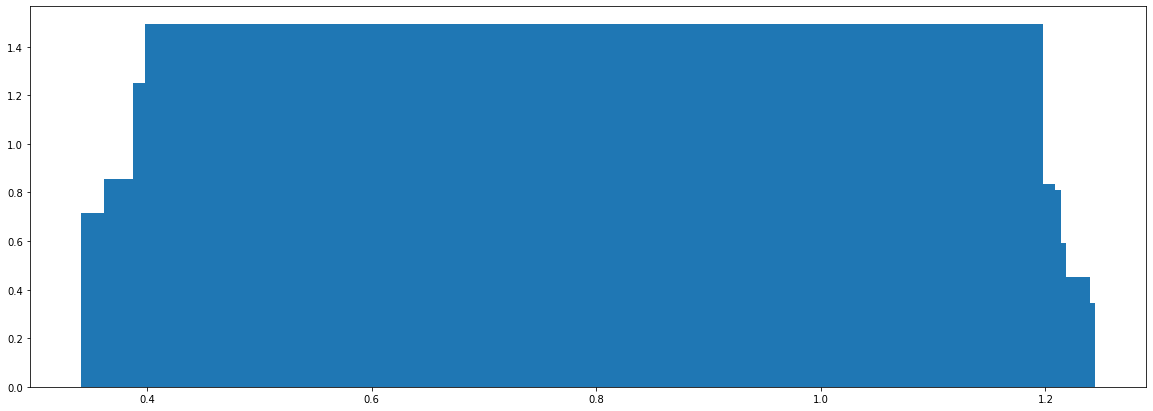

In [55]:
fig = plt.figure(figsize =(20, 7))
plt.bar(history.history['accuracy'],history.history['val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

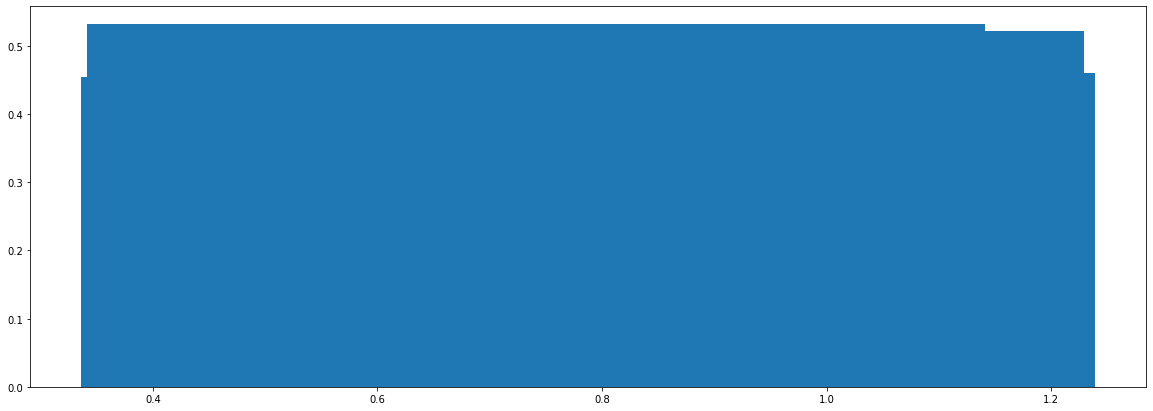

In [56]:
fig = plt.figure(figsize =(20, 7))
plt.bar(history1.history['accuracy'],history1.history['val_loss'])
plt.show